#EE769 Assignment 3(KPCA)

##Vyomkesh Chaudhary
##203070028

In [1]:
import numpy as np                                      ##importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Reading Dataset

In [2]:
from google.colab import files

data_upload = files.upload()

for file_name in data_upload.keys():
  print(f"{file_name} has been uploaded, with length {len(data_upload[file_name])}")

Saving DataKPCA.csv to DataKPCA.csv
DataKPCA.csv has been uploaded, with length 16564


In [4]:
df = pd.read_csv('/content/DataKPCA.csv')                       ## Reading csv files into data frames

In [5]:
df

,x1,x2,x3,x4,x5,x6,x7
0,2.596641,15.263178,-46.289607,-10.993265,-2.266729,1.935832,2.039688
1,3.096286,14.784802,-48.175614,-8.799362,-2.220871,1.851201,1.921974
2,3.360246,14.774917,-49.471841,-9.030501,-1.760447,1.753114,2.041933
3,2.214819,15.027394,-43.200400,-13.565001,-2.643018,2.200463,2.141847
4,3.398576,15.115756,-49.416644,-6.857672,-2.025936,1.788085,1.875540
...,...,...,...,...,...,...,...
185,2.647090,14.246231,-44.947807,-10.412540,-2.809695,2.084152,1.903990
186,2.677908,14.620351,-45.776334,-10.196029,-2.640178,2.038005,1.910832
187,3.543866,14.487241,-49.692284,-7.773038,-1.865513,1.752195,1.952922
188,3.563404,13.945495,-49.131439,-8.156546,-2.104684,1.773425,1.914397


# Observation:

There are 7 columns which includes 7 features .

There are 190 samples. 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      190 non-null    float64
 1   x2      190 non-null    float64
 2   x3      190 non-null    float64
 3   x4      190 non-null    float64
 4   x5      190 non-null    float64
 5   x6      190 non-null    float64
 6   x7      190 non-null    float64
dtypes: float64(7)
memory usage: 10.5 KB


#Observations:

 All features are numerical.


In [7]:
for col in df: # for each column
  unique_entries = pd.unique(df[col]) # unique elements in a column
  print(f"The column '{col}'  has {len(unique_entries)} unique entries, and {df[col].isnull().sum()} NaN values")


The column 'x1'  has 190 unique entries, and 0 NaN values
The column 'x2'  has 190 unique entries, and 0 NaN values
The column 'x3'  has 190 unique entries, and 0 NaN values
The column 'x4'  has 190 unique entries, and 0 NaN values
The column 'x5'  has 190 unique entries, and 0 NaN values
The column 'x6'  has 190 unique entries, and 0 NaN values
The column 'x7'  has 190 unique entries, and 0 NaN values


#Observations:
 
There are no Null entries.

# Part A :Visualize and pre-processing

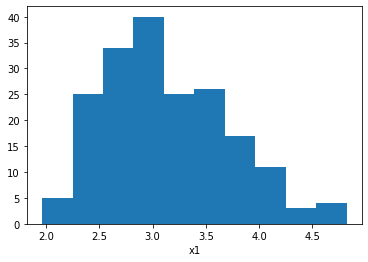

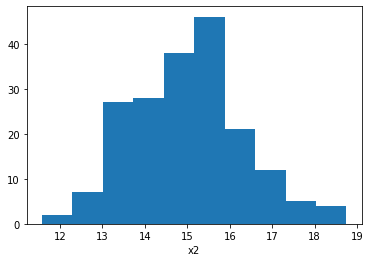

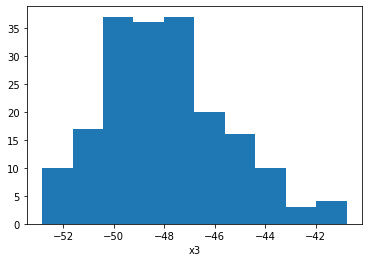

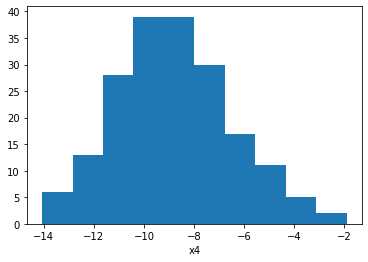

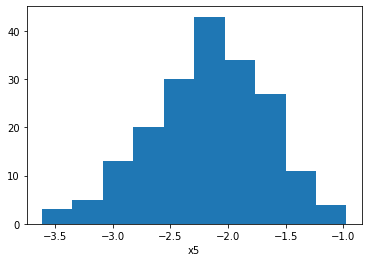

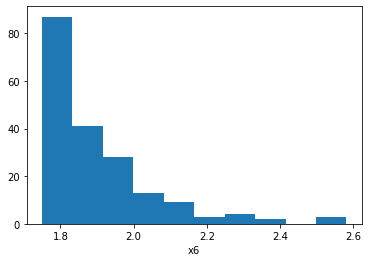

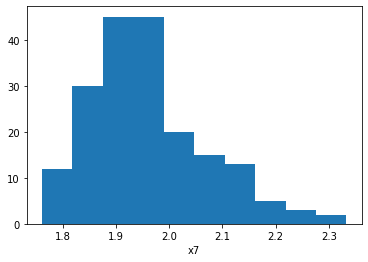

In [8]:
for col in df.columns.values: #for all columns
  #if the values are integer or discrete
  if(df[col].dtypes == 'int64') | (df[col].dtypes == 'float64'):
    plt.hist(df[col],10 if len(pd.unique(df[col]))>20 else len(pd.unique(df[col])))
    plt.xlabel(col)
    plt.show()

#Observations:

Data is well spreaded

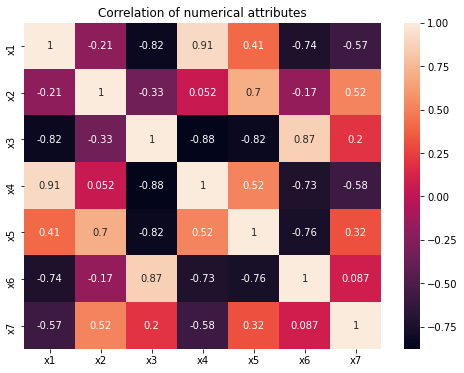

In [9]:
correlation = df.corr(method='spearman')

f, ax = plt.subplots(figsize=(8,6))
plt.title('Correlation of numerical attributes', size=12)
sns.heatmap(correlation,annot=True)

#Observations:

1. x1 and x4 are highly correlated.
2. x3 and x6 are highly correlated.

#Power Transformation

In [10]:
from sklearn.preprocessing import PowerTransformer
power = PowerTransformer(method='yeo-johnson', standardize=True)
df_transformed = power.fit_transform(df)


In [11]:
df_transformed1 = pd.DataFrame(df_transformed)

In [41]:
from sklearn.manifold import TSNE

tsne = TSNE(2,random_state=1, n_iter=15000, metric="cosine")

embs = tsne.fit_transform(df_transformed1)
# Add to dataframe for convenience
df['x'] = embs[:, 0]
df['y'] = embs[:, 1]

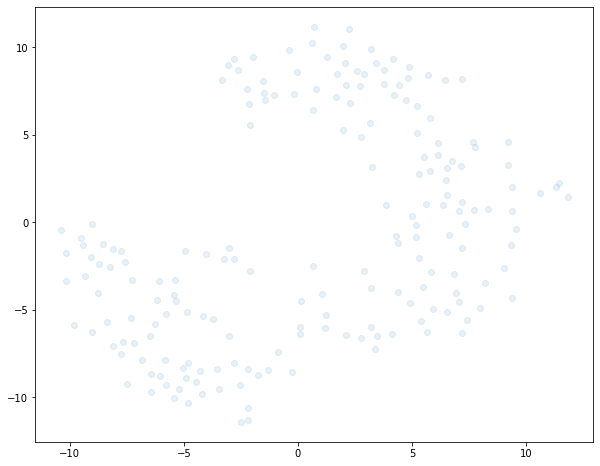

In [42]:
FS = (10, 8)
fig, ax = plt.subplots(figsize=FS)
# Make points translucent so we can visually identify regions with a high density of overlapping points
ax.scatter(df.x, df.y, alpha=.1);

#Observations:
Data looks non linearly separable.


#Part B:Train KPCA

In [37]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components=10,kernel ='rbf', gamma = 15)
X_kpca = kpca.fit_transform(df_transformed1)
  

# Part C: Plot the variance explained versus KPCA dimensions for up to 10 dimensions.

In [38]:
expl_var_kpca = np.var(X_kpca, axis=0)

In [39]:
expl_var_ratio_kpca = expl_var_kpca / np.sum(expl_var_kpca)

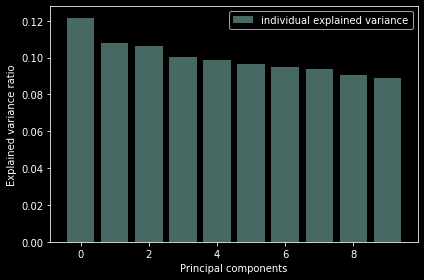

In [40]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(10), expl_var_ratio_kpca, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

#Observations:

Approx first 10 dimensions contains 90 percent variance


#Credits:

1.EE769 1 2 2 ML for Smart Monkeys, Youtube, Prof Amit Sethi, EE IITB

2.https://www.bogotobogo.com/python/scikit-learn/scikit_machine_learning_Data_Compresssion_via_Dimensionality_Reduction_3-nonlinear-mappings-via-kernel-principal-component-analysis.php
